In [21]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.callbacks import History
from keras.callbacks import LearningRateScheduler
from keras.optimizers import Adam

# Clear the session
keras.backend.clear_session()

In [22]:


# Set up the data
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

# Reshape the inputs to have one channel
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_valid = X_valid.reshape(X_valid.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)




history = History()

def schedule(epoch, lr):
    if epoch >= 40:
        return 0.0001
    return 0.001

scheduler = LearningRateScheduler(schedule)


In [23]:

model = Sequential()

# Start with convolutional layers
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Then fully connected layers
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(BatchNormalization()),
model.add(Dropout(0.5)),
model.add(Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=Adam(learning_rate=0.001),
              metrics=["accuracy"])

early_stopping = keras.callbacks.EarlyStopping(patience=15, monitor="val_loss")

model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[history, early_stopping, scheduler])


Epoch 1/100
1719/1719 [==============================] - 51s 29ms/step - loss: 0.4951 - accuracy: 0.8284 - val_loss: 0.2898 - val_accuracy: 0.8920 - lr: 0.0010
Epoch 2/100
1719/1719 [==============================] - 55s 32ms/step - loss: 0.3455 - accuracy: 0.8764 - val_loss: 0.2755 - val_accuracy: 0.9050 - lr: 0.0010
Epoch 3/100
1719/1719 [==============================] - 46s 27ms/step - loss: 0.3091 - accuracy: 0.8887 - val_loss: 0.2960 - val_accuracy: 0.9054 - lr: 0.0010
Epoch 4/100
1719/1719 [==============================] - 47s 27ms/step - loss: 0.2864 - accuracy: 0.8950 - val_loss: 0.2277 - val_accuracy: 0.9152 - lr: 0.0010
Epoch 5/100
1719/1719 [==============================] - 46s 27ms/step - loss: 0.2698 - accuracy: 0.9013 - val_loss: 0.2462 - val_accuracy: 0.9098 - lr: 0.0010
Epoch 6/100
1719/1719 [==============================] - 46s 27ms/step - loss: 0.2583 - accuracy: 0.9063 - val_loss: 0.2183 - val_accuracy: 0.9154 - lr: 0.0010
Epoch 7/100
1719/1719 [=================

In [24]:
train_loss, train_acc = model.evaluate(X_train, y_train)
print('Train accuracy:', train_acc)

# Evaluate on validation data
valid_loss, valid_acc = model.evaluate(X_valid, y_valid)
print('Validation accuracy:', valid_acc)

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1719/1719 [==============================] - 11s 6ms/step - loss: 0.0405 - accuracy: 0.9883
Train accuracy: 0.9883090853691101
157/157 [==============================] - 1s 6ms/step - loss: 0.1765 - accuracy: 0.9424
Validation accuracy: 0.9423999786376953
313/313 [==============================] - 2s 6ms/step - loss: 0.2204 - accuracy: 0.9323
Test accuracy: 0.9322999715805054


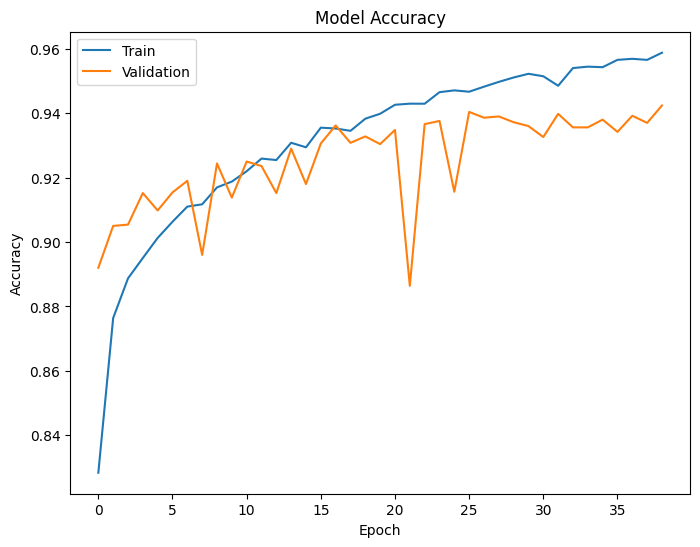

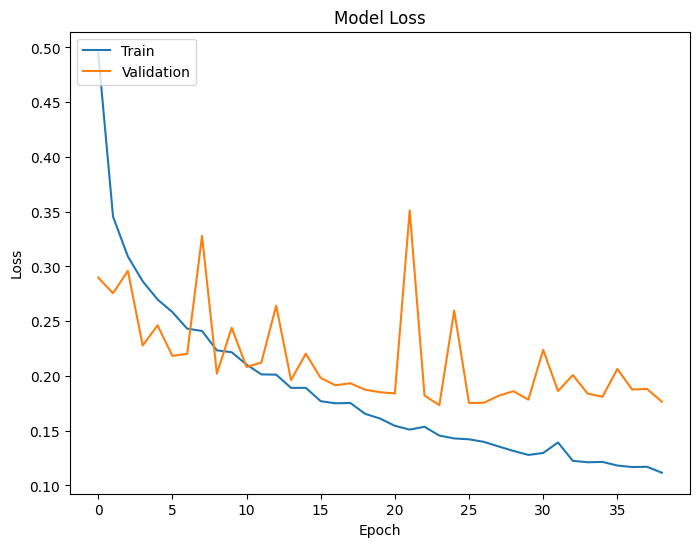

In [25]:
import matplotlib.pyplot as plt

# Summarize history for accuracy
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Summarize history for loss
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()